**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [39]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load( open("fbb_matplotlibrc.json"))
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [40]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [41]:
np.random.seed(100)
x = np.arange(2, 10, dtype=np.int)
print(x)
y = line(3,x,0,errors)
print(y)

[2 3 4 5 6 7 8 9]
[  4.4483645    8.58653718   9.1418662   17.12203919  17.95248581
  23.36688305  26.14873663  22.50683886]


Text(0,0.5,'Endogenous')

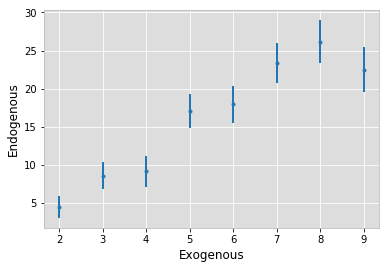

In [42]:
plt.errorbar(x,y, yerr = errors(x), fmt = '.')
plt.xlabel("Exogenous")
plt.ylabel("Endogenous")

Figure 1: From the figure above we can see that the error increases as our Exogenous variable increases. This is consistent with how we are calculating errors in our above function.

# print y, x, and the result of applying statsmodels.api.add_constant() to x

# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [43]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     385.1
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.23e-07
Time:                        18:24:27   Log-Likelihood:                -18.273
No. Observations:                   8   AIC:                             38.55
Df Residuals:                       7   BIC:                             38.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.9573      0.151     19.625      0.000         2.601     3.314
==============================================================================
Omnibus:                        0.942   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.627
Skew:                          -0.285   Prob(JB):                        0.731
Kurtosis:                       1.752   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#THE RIGHT WAY
smfit = smf.OLS(y, sm.add_constant(x)).fit()
print("y: " + str(y))
print("x: " + str(sm.add_constant(x)))
smfit.summary()

y: [  4.4483645    8.58653718   9.1418662   17.12203919  17.95248581
  23.36688305  26.14873663  22.50683886]
x: [[ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     53.27
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           0.000337
Time:                        18:24:27   Log-Likelihood:                -18.219
No. Observations:                   8   AIC:                             40.44
Df Residuals:                       6   BIC:                             40.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.7157      2.505     -0.286      0.785        -6.845     5.413
x1             3.0682      0.420      7.298      0.000         2.039     4.097
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.621
Skew:                          -0.513   Prob(JB):                        0.733
Kurtosis:                       2.099   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The difference: When doing the OLS fit with the add_constant function, we are getting a lower F-statistic and R-squared. 

In [45]:
#THE RIGHT WAY

# plot the data (as points) and both statsmodels fits

In [46]:
p = smfit.params
p_wrong = smfit_wrong.params
print(p)
print(p_wrong)

[-0.71568562  3.06816446]
[ 2.95728359]


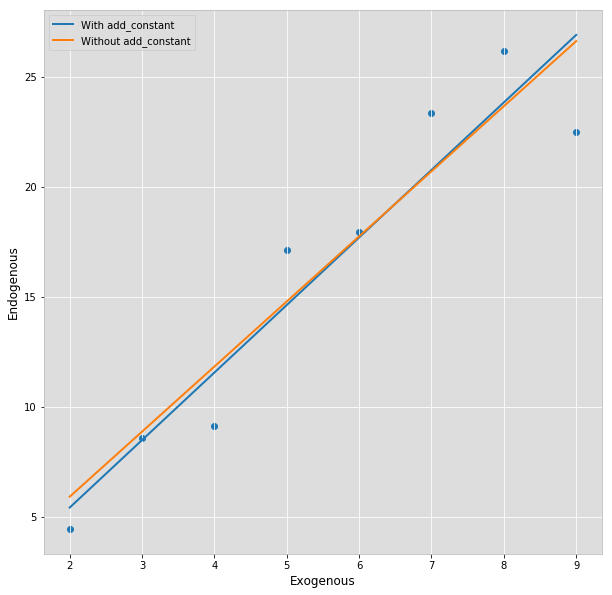

In [47]:
fig = plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.plot(x, p[0] + p[1] * x, label = "With add_constant")
plt.plot(x, p_wrong[0] * x, label = "Without add_constant")
plt.xlabel("Exogenous")
plt.ylabel("Endogenous")
plt.legend()

Figure 2:

In the above plot, we have two different lines, one with the correct OLS fit and one with an incorrect OLS fit. The blue line is showing the correct OLS fit using the add_constant function so that we can generate a intercept and slope for our prediction model. The orange line does not use the add_constant function and does not give a useable prediction model. 

While we dont have enough data here, we can see that at the tails of our data, the orange fit is already moving away from the trends in the data. 

# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

<Container object of 3 artists>

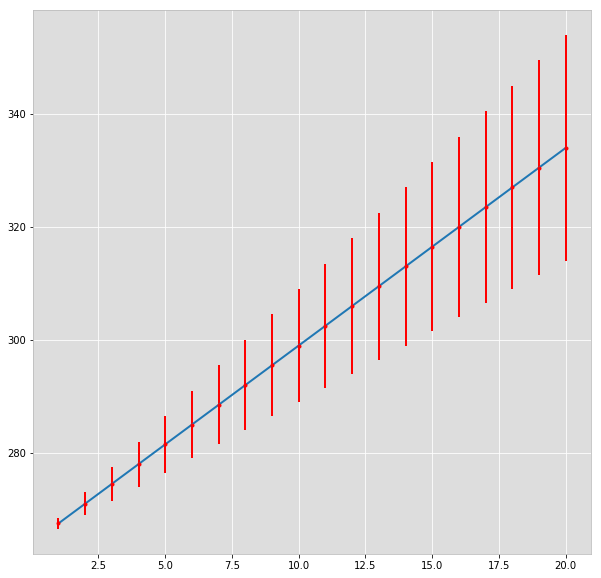

In [48]:
np.random.seed(1111)
slope = 3.5
intercept = (slope + np.random.randn(1)) * 120
x_new = np.linspace(1,20,20)
line = (x_new * slope) + intercept

fig = plt.figure(figsize = (10,10))
plt.plot(x_new, line)
plt.errorbar(x_new, line, yerr = x_new, fmt = '.r')

# repeat step 3

# repeat step 4

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [53]:
def weights(x):
    std_x = np.sqrt(np.std(x))
    x = 1 / (x * std_x)
    return x
print(y)
print(sm.add_constant(x))
weights(x)

[  4.4483645    8.58653718   9.1418662   17.12203919  17.95248581
  23.36688305  26.14873663  22.50683886]
[[ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]]


array([ 0.33031643,  0.22021095,  0.16515822,  0.13212657,  0.11010548,
        0.09437612,  0.08257911,  0.07340365])

In [51]:
weighted_smfit = smf.WLS(y, sm.add_constant(x), weights=weights(x)).fit()
weighted_smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            WLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     84.76
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           9.26e-05
Time:                        18:24:47   Log-Likelihood:                -17.023
No. Observations:                   8   AIC:                             38.05
Df Residuals:                       6   BIC:                             38.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.6252      1.723     -0.943      0.382        -5.840     2.590
x1             3.2335      0.351      9.207      0.000         2.374     4.093
==============================================================================
Omnibus:                        0.937   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.697
Skew:                          -0.564   Prob(JB):                        0.706
Kurtosis:                       2.096   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

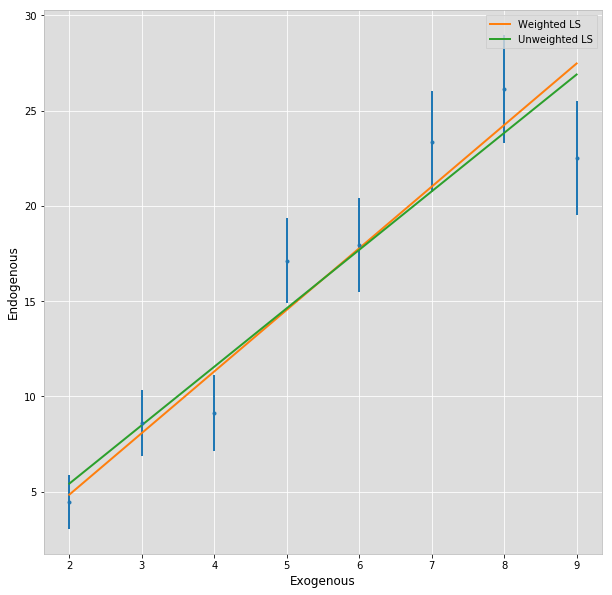

In [52]:
p_WLS = weighted_smfit.params

fig = plt.figure(figsize = (10,10))
plt.errorbar(x, y, yerr = errors(x), fmt = '.')
plt.plot(x, p_WLS[0] + p_WLS[1] * x, label = "Weighted LS")
plt.plot(x, p[0] + p[1] * x, label = "Unweighted LS")
plt.xlabel("Exogenous")
plt.ylabel("Endogenous")
plt.legend()

# Caption

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.75e-06
Time:                        12:14:01   Log-Likelihood:                -29.722
No. Observations:                  10   AIC:                             63.44
Df Residuals:                       8   BIC:                             64.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5287      2.356     30.781      0.000      67.095      77.962
x1             0.6314      0.054     11.612      0.000       0.506       0.757
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.720
Skew:                           0.203   Prob(JB):                        0.698
Kurtosis:                       1.750   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

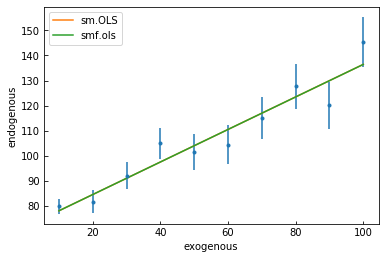

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();